# Заливка данных

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/german-credit.csv')

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1


# Удаление столбца

In [ ]:
del df['Unnamed: 0']

# Переименование столбцов

In [ ]:
df.columns = ['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'default']

# Вывод анализа незаполненных ячеек


In [ ]:
df.isna().mean()

age                 0.000
sex                 0.000
job                 0.000
housing             0.000
saving_accounts     0.183
checking_account    0.394
credit_amount       0.000
duration            0.000
purpose             0.000
default             0.000
dtype: float64

# Анализ

In [ ]:
df

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,0
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,1


In [ ]:
df['checking_account'] = df['checking_account'].fillna('no_info')

In [ ]:
(df.groupby(['checking_account','sex'])
[['default','credit_amount']]
 .agg({'default':['count','mean'], 
       'credit_amount':['mean','median']}))

default           credit_amount        
                          count      mean          mean  median
checking_account sex                                           
little           female      88  0.522727   2564.215909  1838.5
                 male       186  0.478495   3464.295699  2589.5
moderate         female      86  0.476744   3720.034884  2651.0
                 male       183  0.349727   3878.092896  2520.0
no_info          female     116  0.155172   2708.750000  1935.0
                 male       278  0.100719   3310.169065  2393.5
rich             female      20  0.200000   1616.050000  1400.5
                 male        43  0.232558   2438.860465  1925.0

In [ ]:
df.pivot_table(index='checking_account', 
               values='default', 
               aggfunc=['count','mean'])

,count,mean
,default,default
checking_account,,
little,274,0.492701
moderate,269,0.390335
no_info,394,0.116751
rich,63,0.222222


In [ ]:
(df.groupby('checking_account')
['default'].agg(['count', 'mean']))

,count,mean
checking_account,,
little,274,0.492701
moderate,269,0.390335
no_info,394,0.116751
rich,63,0.222222


In [ ]:
(df.groupby(['checking_account'])['default']
.agg(['count', 'mean'])
.sort_values('count',ascending=False)
.style
.format({
    'mean': '{:,.1%}'.format,
})
.applymap(
     lambda x: 'background-color : green' if x>0.3 else '', 
     subset=['mean']))

,count,mean
checking_account,,
no_info,394,11.7%
little,274,49.3%
moderate,269,39.0%
rich,63,22.2%


## Интервалы

In [ ]:
df['credit_amount_group'] = pd.cut(df['credit_amount'],5)

In [ ]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,credit_amount_group
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,"(231.826, 3884.8]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(3884.8, 7519.6]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(231.826, 3884.8]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(7519.6, 11154.4]"
4,53,male,2,free,little,little,4870,24,car,1,"(3884.8, 7519.6]"


In [ ]:
(df.groupby('credit_amount_group')
['default'].agg(['count', 'mean']))

,count,mean
credit_amount_group,,
"(231.826, 3884.8]",738,0.256098
"(3884.8, 7519.6]",177,0.384181
"(7519.6, 11154.4]",57,0.403509
"(11154.4, 14789.2]",22,0.727273
"(14789.2, 18424.0]",6,0.666667


In [ ]:
df['credit_amount_group2'] = pd.qcut(df['credit_amount'],5)

In [ ]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,credit_amount_group,credit_amount_group2
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,"(231.826, 3884.8]","(249.999, 1262.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(3884.8, 7519.6]","(4720.0, 18424.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(231.826, 3884.8]","(1906.8, 2852.4]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(7519.6, 11154.4]","(4720.0, 18424.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(3884.8, 7519.6]","(4720.0, 18424.0]"


In [ ]:
(df.groupby('credit_amount_group2')
['default'].agg(['count', 'mean']))

,count,mean
credit_amount_group2,,
"(249.999, 1262.0]",201,0.303483
"(1262.0, 1906.8]",199,0.241206
"(1906.8, 2852.4]",200,0.270000
"(2852.4, 4720.0]",200,0.260000
"(4720.0, 18424.0]",200,0.425000


In [ ]:
df['credit_amount_group'] = pd.cut(df['credit_amount'],[0,1000,2000,3000,5000,np.inf])

In [ ]:
(df.groupby('credit_amount_group')
['default'].agg(['count', 'mean']))

,count,mean
credit_amount_group,,
"(0.0, 1000.0]",116,0.318966
"(1000.0, 2000.0]",316,0.265823
"(2000.0, 3000.0]",188,0.239362
"(3000.0, 5000.0]",192,0.291667
"(5000.0, inf]",188,0.414894


In [ ]:
df['credit_amount_group3'] = pd.cut(df['credit_amount'],[0,1000,np.inf],labels=['0-1k','1k+'])

In [ ]:
(df.groupby('credit_amount_group3')
['default'].agg(['count', 'mean']))

,count,mean
credit_amount_group3,,
0-1k,116,0.318966
1k+,884,0.297511


## графики

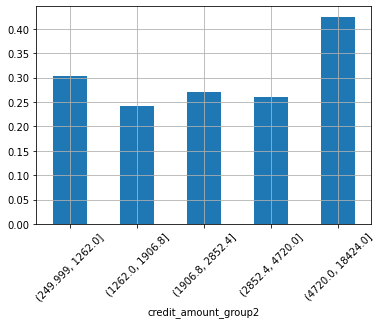

In [ ]:
df.groupby('credit_amount_group2')['default'].mean().plot(rot=45, ylim=0, grid=True, kind='bar')

In [ ]:
df['checking_account'].value_counts()

no_info     394
little      274
moderate    269
rich         63
Name: checking_account, dtype: int64

In [ ]:
df['checking_account'].value_counts(normalize=True)

no_info     0.394
little      0.274
moderate    0.269
rich        0.063
Name: checking_account, dtype: float64

In [ ]:
pd.get_dummies(df['checking_account'])

,little,moderate,no_info,rich
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
995,0,0,1,0
996,1,0,0,0
997,0,0,1,0
998,1,0,0,0


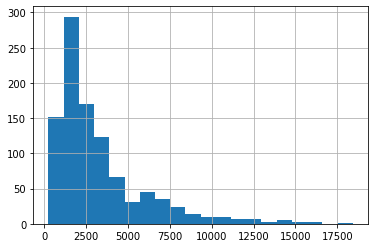

In [ ]:
df['credit_amount'].hist(bins=20)

In [ ]:
df['credit_amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

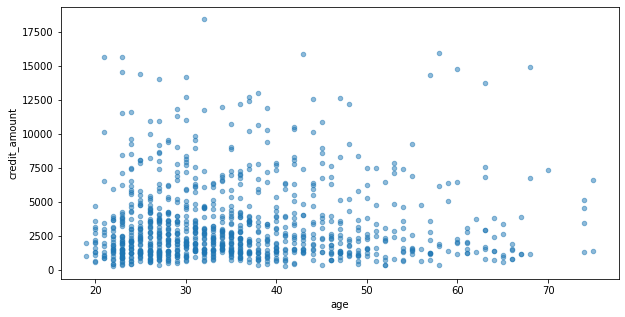

In [ ]:
df.plot(x='age', y='credit_amount', kind='scatter', figsize=(10,5), alpha=0.5)

In [ ]:
df['age_group'] = pd.qcut(df['age'],5)

In [ ]:
df.groupby('age_group')['credit_amount'].agg(['count','mean','median'])

,count,mean,median
age_group,,,
"(18.999, 26.0]",240,2987.645833,2112.5
"(26.0, 30.0]",171,3436.578947,2463.0
"(30.0, 36.0]",216,3240.439815,2427.0
"(36.0, 45.0]",187,3618.401070,2522.0
"(45.0, 75.0]",186,3172.000000,2064.0


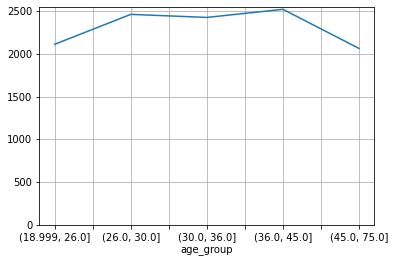

In [ ]:
df.groupby('age_group')['credit_amount'].median().plot(ylim=0,grid=True)